In [21]:
workspace()

El proyecto final para la clase de métodos númericos avanzados, descrito en este notebook, tratará con la problemática de las soluciones a ecuaciones lineales con intervalos desde varios métodos de soluciones directos e iterativos, con la finalidad de comparar la fiabilidad, la convergencia y la sencillez de cada uno.

Los métodos a implementar son, el directo (eliminación de Gauss), la versión linear de Krawczyk y el Hansel-Sengupta. Por último se intentará extender lo antes descrito para una ecuación de eigenvalores.

Una aplicación directa de este tipode problemas es el caso en el las resistencias de una mallado eléctrico son tomadas con su toleracia incluida, y no sólo con un número fijo, es decir, con un intervalo. Y, Por lo tanto, las corrientes resultado también estarán dadas por un intervalo.

In [5]:
using Intervalos

    promote_type(Type{T<:Number},Type{Interval}) at /home/juser/Untitled Folder/Intervalos.jl:324
is ambiguous with: 
    promote_type(Type{None},Type{T}) at promotion.jl:103.
To fix, define 
    promote_type(Type{None},Type{Interval})
before the new definition.
    promote_type(Type{T<:Number},Type{Interval}) at /home/juser/Untitled Folder/Intervalos.jl:324
is ambiguous with: 
    promote_type(Type{T},Type{T}) at promotion.jl:101.
To fix, define 
    promote_type(Type{_<:Number},Type{_<:Number})
before the new definition.


In [15]:
function midpoint(N::Interval) #PuntoMedio
      return (N.left+N.right)/2
end

midpoint (generic function with 2 methods)

In [180]:
type IntervalVector #Defino un Vector de intervalos
    row::Vector{Interval}
end


function Base.length(x::IntervalVector) #Cuantos intervalos contiene el vector 
    length(x.row)
end

function midpoint(x::IntervalVector) #Punto medio de un vector de intervalos
    mid=Real[]
    for i=1:length(x)
        push!(mid,midpoint(x.row[i]))
    end
    return mid
end

midpoint (generic function with 3 methods)

In [182]:
type IntervalMatrix #Defino una matrix de intervalos
    rows::Vector{IntervalVector}
end

#Definí una matriz de intervalos donde las columnas están descritas por cada vector proporcionado

function midpoint(M::IntervalMatrix)
    mid1=Vector[]
    for i=1:length(M.rows)
        push!(mid1,midpoint(M.rows[i]))
    end
    return mid1
end

midpoint (generic function with 3 methods)

In [192]:
A.rows[1]

IntervalVector([Interval(1800,2200),Interval(-1100,-900)])

In [ ]:
function *(M::IntervalMatrix, N::IntervalMatrix)
    if length(M.rows)==length(N.rows[1])
        P=Array[]
        for i=1:length(M.rows)
            #Encuentro cierta dificultad para definir las operaciones de matrices de intervalos, por lo cual, 
            #intentaré otra manera de definir mis matrices           

Intentemos resolver por método directo (eliminación de Gauss)

In [88]:
#GaussianElimination 2x2

function GaussianElimination(A::IntervalMatrix, b::IntervalVector)
    
    
    a11=A.rows[1].row[1]
    a21=A.rows[1].row[2]
    a12=A.rows[2].row[1]
    a22=A.rows[2].row[2]
    
    a=a22-(a21/a11)*a12
    d=b.row[2]-(a21/a11)*b.row[1]
    x2=d/a

    c=b.row[1]-a12*x2
    x1=c/A.rows[1].row[1]
    
    return IntervalVector([x1,x2])
end

GaussianElimination (generic function with 1 method)

In [6]:
R1=Interval(900,1100)
R2=Interval(900,1100)
R3=Interval(900,1100)

V1=Interval(10)
V2=Interval(5);

In [5]:
a1=IntervalVector([R1 + R2, -R2])
a2=IntervalVector([-R2, R2 + R3])
A=IntervalMatrix([a1, a2])

b=IntervalVector([V1, -V2]);

LoadError: type: apply: expected Function, got Type{Array{Interval,1}}
while loading In[5], in expression starting on line 1

In [91]:
GaussianElimination(A,b)

IntervalVector([Interval(0.004227994227994228,0.006029786400156771),Interval(-0.0006349206349206357,0.0007760141093474431)])

Lo cual contiene a la solución exacta, es decir, la solución  que daría si no tuvieramos incertidumbre en las resitencias.

###Buscando la definición más eficiente y fácil de usar

In [7]:
typealias IntervalMatrix{Interval} Array{Interval,2}
#Esto hará que cuando cree funciones pueda llamar IntervalMatrix a lo que yo quiera y 
#julia detectará que es un Array{Interval,2}  

typealias IntervalVector{Interval} Array{Interval,1};

In [8]:
A=[R1+R2 -R2;-R2 R2+R3]

2x2 Array{Interval,2}:
 Interval(1800,2200)   Interval(-1100,-900)
 Interval(-1100,-900)  Interval(1800,2200) 

In [9]:
b=[V1;-V2]

2-element Array{Interval,1}:
 Interval(10,10)
 Interval(-5,-5)

In [11]:
B=[Interval(1) Interval(2); Interval(3) Interval(4)]

2x2 Array{Interval,2}:
 Interval(1,1)  Interval(2,2)
 Interval(3,3)  Interval(4,4)

In [16]:
A*B #No tengo que definir las operaciones entre matrices de intervalos, julia ya sabe como multiplicar matrices
# y mi modulo ya sabe como hacer las operaciones con intervalos

2x2 Array{Interval,2}:
 Interval(-1500,-500)  Interval(-800,800) 
 Interval(4300,5700)   Interval(5000,7000)

In [17]:
function midpoint(M::IntervalMatrix)
    x=zeros(Real,size(M)[1],size(M)[2])
    for i=1:size(M)[1]
        for j=1:size(M)[2]
            x[i,j]=midpoint(M[i,j])
        end
    end
    return x
end

midpoint (generic function with 2 methods)

In [76]:
midpoint(A*B)

2x2 Array{Real,2}:
 -1000.0     0.0
  5000.0  6000.0

In [19]:
#GaussianElimination 2x2

function GaussianElimination2x2(A::IntervalMatrix, b::IntervalVector)
    

    a=A[2,2]-(A[2,1]/A[1,1])*A[1,2]
    d=b[2]-(A[2,1]/A[1,1])*b[1]
    x2=d/a

    c=b[1]-A[1,2]*x2
    x1=c/A[1,1]
    
    
    X=[x1,x2]
    return X
end

#Evidentemente esta forma de nombrar es mucho más fácil de usar, en cuanto a indices y en cuanto a operaciones, y
# por lo tanto, más fácil de manipular

GaussianElimination2x2 (generic function with 1 method)

In [21]:
GaussianElimination2x2(A,b)

2-element Array{Interval,1}:
 Interval(0.004227994227994228,0.006029786400156771)   
 Interval(-0.0006349206349206357,0.0007760141093474431)

In [358]:
lufact([0 0;0 1])

LU{Float64,Array{Float64,2}}(2x2 Array{Float64,2}:
 0.0  0.0
 0.0  1.0,[1,2],1)

In [ ]:
function GaussianElimination(A::IntervalMatrix, b::IntervalVector)
    

In [22]:
A=[2 1 -1;-3 -1 2;-2 1 2]

3x3 Array{Int64,2}:
  2   1  -1
 -3  -1   2
 -2   1   2

In [392]:
b=[8 -11 -3]

1x3 Array{Int64,2}:
 8  -11  -3

In [397]:
A=[2 1 -1;-3 -1 2;-2 1 2]
b=[8;-11;-3]

x = A\b

3-element Array{Float64,1}:
  2.0
  3.0
 -1.0

In [405]:
A=[R1+R2 -R2;-R2 R2+R3]
b=[V1;-V2]

x = A\b

LoadError: `one` has no method matching one(::Type{Interval})
while loading In[405], in expression starting on line 4

###Otro método directo

###Cramer Rule

In [20]:
function Det2x2(A::IntervalMatrix)
    if size(A)[1]==size(A)[2]
        if size(A)[1]==2
            return A[1,1]*A[2,2]-A[1,2]*A[2,1]
            else
            return error("La matriz no es de 2x2")
        end
    else
        return error("La matriz no es cuadrada")
    end
end

Det2x2 (generic function with 1 method)

In [77]:
A=[Interval(-2,3) Interval(1,5);Interval(1,3) Interval(0, -2)]
Det2x2(A)

Interval(-11,-7)

In [97]:
function Det3x3(A::IntervalMatrix)
    if size(A)[1]==size(A)[2]
        if size(A)[1]==3
            X1=[A[2,2] A[2,3]; A[3,2] A[3,3]]
            X2=[A[2,1] A[2,3]; A[3,1] A[3,3]]
            X3=[A[2,1] A[2,2]; A[3,1] A[3,2]]
            return A[1,1]*Det2x2(X1) -A[2,2]*Det2x2(X2) + A[3,3]*Det2x2(X3)
            else
            return error("La matriz no es de 2x2")
        end
    else
        return error("La matriz no es cuadrada")
    end
end

Det3x3 (generic function with 1 method)

In [100]:
A=[Interval(1.9,2.1) Interval(0.9,1.1) Interval(-1.1,-0.9); Interval(-3.1,-2.9) Interval(-1.1,-0.9) Interval(1.9,2.1); Interval(-2.1,-1.9) Interval(0.9,1.1) Interval(1.9,2.1)]

3x3 Array{Interval,2}:
 Interval(1.9,2.1)    Interval(0.9,1.1)    Interval(-1.1,-0.9)
 Interval(-3.1,-2.9)  Interval(-1.1,-0.9)  Interval(1.9,2.1)  
 Interval(-2.1,-1.9)  Interval(0.9,1.1)    Interval(1.9,2.1)  

In [101]:
Det3x3(A)

Interval(-20.904000000000007,-19.295999999999996)

###Vease ley pseudodistributiva Véase pags 32,33-Moore

###¿Qué pasa si no uso la definición de los menores para Matrices de $3\times3$?

In [104]:
function Det3x3Prueba(A::IntervalMatrix)
    if size(A)[1]==size(A)[2]
        if size(A)[1]==3
            X1=[A[2,2] A[2,3]; A[3,2] A[3,3]]
            X2=[A[2,1] A[2,3]; A[3,1] A[3,3]]
            X3=[A[2,1] A[2,2]; A[3,1] A[3,2]]
            return A[1,1]*A[2,2]*A[3,3]-A[1,1]*A[2,3]*A[3,2]-A[2,2]*A[2,1]*A[3,3]-A[2,2]*A[2,3]*A[3,1]+A[3,3]*A[2,1]*A[3,2]-A[3,3]*A[2,2]*A[3,1]
            else
            return error("La matriz no es de 2x2")
        end
    else
        return error("La matriz no es cuadrada")
    end
end

Det3x3Prueba (generic function with 1 method)

In [105]:
Det3x3Prueba(A)

Interval(-28.920000000000005,-27.719999999999995)

###Están dando resultados sumamente diferentes, y  uno debería contener al el otro, algo debe estar mal

In [21]:
function CramerRule(A::IntervalMatrix, b::IntervalVector) #Falta implementa cuando el determinante de A es cero, indefinición
    if size(A)[1]==size(A)[2]
        if size(A)[1]==2
            Det=Det2x2(A)
            x=Det2x2([b[1] A[1,2]; b[2] A[2,2]])/Det
            y=Det2x2([A[1,1] b[1]; A[2,1] b[2]])/Det
            v=[x;y]
            return v
        else
            if size(A)[1]==3
                Det=Det3x3(A)
                x=Det3x3([b[1] A[1,2] A[1,3];b[2] A[2,2] A[2,3];b[3] A[3,2] A[3,3]])/Det
                y=Det3x3([A[1,1] b[1] A[1,3];A[2,1] b[2] A[2,3];A[3,1] b[3] A[3,3]])/Det
                z=Det3x3([A[1,1] A[1,2] b[1];A[2,1] A[2,2] b[2];A[3,1] A[3,2] b[3]])/Det
                v=[x;y;z]
                return v
            else
                return error("Aún no se definen los determinantes para matrices más grandes que 3x3")
            end
        end
    else
        return error("No es una matriz cuadrada")
    end
end

CramerRule (generic function with 1 method)

In [78]:
A=[R1+R2 -R2;-R2 R2+R3]
b=[V1;-V2]
CramerRule(A,b)

2-element Array{Interval,1}:
 Interval(0.0037190082644628095,0.006790123456790124)
 Interval(0.0,0.0)                                   

In [93]:
A=[Interval(1.9,2.1) Interval(0.9,1.1) Interval(-1.1,-0.9); Interval(-3.1,-2.9) Interval(-1.1,-0.9) Interval(1.9,2.1); Interval(-2.1,-1.9) Interval(0.9,1.1) Interval(1.9,2.1)]
b=[Interval(3);Interval(1);-Interval(2)]
CramerRule(A,b)

3-element Array{Interval,1}:
 Interval(0.33773440489858386,0.4695273631840798) 
 Interval(-1.643864013266999,-1.3547646383467271) 
 Interval(-1.0810530679933672,-0.9213547646383463)

In [88]:
A

3x3 Array{Interval,2}:
 Interval(1.9,2.1)    Interval(0.9,1.1)    Interval(-1.1,-0.9)
 Interval(-3.1,-2.9)  Interval(-1.1,-0.9)  Interval(1.9,2.1)  
 Interval(-2.1,-1.9)  Interval(0.9,1.1)    Interval(1.9,2.1)  

In [107]:
Det3x3(A)

Interval(-20.904000000000007,-19.295999999999996)

In [79]:
b

2-element Array{Interval,1}:
 Interval(10,10)
 Interval(-5,-5)

##Métodos aproximados

Linear Krawczyk Method...

In [22]:
function AbsoluteValue(x::Interval) #Valor absoluto de un intervalo, poner en el modulo
    return max(abs(x.left),abs(x.right))
end

AbsoluteValue (generic function with 1 method)

In [80]:
function Norm(A::IntervalMatrix)
    v=Real[]
    for i=1:size(A)[1]
        x=0
        for j=1:size(A)[2]
            x=x+AbsoluteValue(A[i,j])
        end
        push!(v,x)
    end
    return findmax(v)[1]
end

Norm (generic function with 2 methods)

In [81]:
function Norm(V::IntervalVector)
    v=Real[]
    x=0
    for i=1:size(V)[1]
        x=AbsoluteValue(V[i])
        push!(v,x)
    end
    return findmax(v)[1]
end     

Norm (generic function with 2 methods)

In [25]:
Base.one(A::Interval)=Interval(1)

one (generic function with 21 methods)

In [82]:
function Identidad(A::IntervalMatrix) #Da una matriz identidad en intervalos de las dimesiones de A
    Id=zeros(Any,size(A)[1],size(A)[2])
       for i=1:size(A)[1]
               for j=1:size(A)[2]
                    if i==j
                    Id[i,j]=one(A[i,j])
                end
            end
        end
    return Id
end

Identidad (generic function with 1 method)

In [83]:
A=[R1+R2 -R2;-R2 R2+R3]
b=[V1;-V2];

In [84]:
Y=inv(midpoint(A))
Norm((Identidad(A)*Y)*b)

0.005000000000000001

In [85]:
Y=inv(midpoint(A))
E=Identidad(A)-(Identidad(A)*Y)*A
Norm(E)

0.3000000000000004

In [23]:
c=Norm((Identidad(A)*Y)*b)/(1-Norm(E))

0.007142857142857148

In [86]:
function *(c::Number,x::IntervalVector)
    v=Interval[]
    for i=1:size(x)[1]
        push!(v,c*x[i])
    end
    return v
end

*(x::Interval, c::Number)=*(c,x)
*(x::IntervalVector, c::Number)=*(c,x)

function /(x::IntervalVector,c::Number)
    *(1/c,x)
end

/ (generic function with 81 methods)

In [87]:
function *(c::Number,x::IntervalMatrix)
    v=zeros(Any,size(x)[1],size(x)[2])
     for i=1:size(A)[1]
                for j=1:size(A)[2]
                        v[i,j]=c*A[i,j]
                end
            end
        return v
end

*(x::IntervalMatrix,c::Number)=*(c,x)

* (generic function with 290 methods)

In [88]:
    function Identidad(A::IntervalMatrix) #Da una matriz identidad en intervalos de las dimesiones de A
        Id=zeros(Any,size(A)[1],size(A)[2])
        for i=1:size(A)[1]
                for j=1:size(A)[2]
                    if i==j
                        Id[i,j]=one(A[i,j])
                    end
                end
            end
        return Id
    end

Identidad (generic function with 1 method)

In [89]:
function Intersection(x::Interval, y::Interval) #CAMBIAR LA DEFINICIÓN
    if x.left<y.right||y.left<x.right
          return Interval(max(x.left,y.left), min(x.right, y.right))
      else
        return error("Los intervalos los tienen puntos en común")
      end
end


function Intersection(v::IntervalVector, u::IntervalVector)
    w=Interval[]
    if size(v)[1]==size(u)[1]
        for i=1:size(v)[1]
            push!(w,Intersection(u[i],v[i]))
        end
        return w
    else
        return error("Los vectores proporcionados no tienen la misma cantidad de elementos")
    end
end

Intersection (generic function with 2 methods)

In [90]:
v=[Interval(-1,1);Interval(-3,2)]
u=[Interval(0,1);Interval(-2,2)]
Intersection(u,v)

2-element Array{Interval,1}:
 Interval(0,1) 
 Interval(-2,2)

In [31]:
function KrawczykMethod(A::IntervalMatrix, b::IntervalVector, n::Int64) #n numero de iteraciones
    Y=inv(midpoint(A))
    E=Identidad(A)-Y*A
    c=Norm((Y*b)/(1-Norm(E)))
    X=Interval[]
    if size(A)[1]==size(b)[1]
        for i=1:size(b)[1]
            push!(X,c*Interval(-1,1))
        end

        for j=1:n
            Z=(Y*b + E*X)
            X=Intersection(Z,X)

        end

        return X
    else
        return error("Las dimensiones no son consistentes")
    end
end

KrawczykMethod (generic function with 1 method)

In [91]:
KrawczykMethod(A,b,10)

2-element Array{Interval,1}:
 Interval(0.0038423434430911335,0.0061576565569088654) 
 Interval(-0.0009852427638054253,0.0009852427638054253)

In [33]:
function KrawczykMethod(A::IntervalMatrix, b::IntervalVector, e::Float64) #e=error
    Y=inv(midpoint(A))
    E=Identidad(A)-Y*A
    c=Norm((Y*b)/(1-Norm(E)))
    X=Interval[]
    if size(A)[1]==size(b)[1]
        for i=1:size(b)[1]
            push!(X,c*Interval(-1,1))
        end

        while length(X[1])>=e&&length(X[2])>=e
            Z=(Y*b + E*X)
            X=Intersection(Z,X)
        end
        
        return X
        
    else
        return error("Las dimensiones no son consistentes")
    end
end

KrawczykMethod (generic function with 2 methods)

In [34]:
KrawczykMethod(A,b,1e-2)

2-element Array{Interval,1}:
 Interval(0.002857142857142852,0.007142857142857148)   
 Interval(-0.0021428571428571477,0.0021428571428571477)

In [165]:
using PyPlot
UpX=Float64[]
DownX=Float64[]
UpY=Float64[]
DownY=Float64[]
ExactoCramerUpX=Float64[]
ExactoCramerDownX=Float64[]
ExactoCramerUpY=Float64[]
ExactoCramerDownY=Float64[]
for n=1:30
        push!(UpX,KrawczykMethod(A,b,n)[1].right)
        push!(DownX,KrawczykMethod(A,b,n)[1].left)
        push!(UpY,KrawczykMethod(A,b,n)[2].right)
        push!(DownY,KrawczykMethod(A,b,n)[2].left)
    push!(ExactoCramerUpX,CramerRule(A,b)[1].right)
    push!(ExactoCramerDownX,CramerRule(A,b)[1].left)
    push!(ExactoCramerUpY,CramerRule(A,b)[2].right)
    push!(ExactoCramerDownY,CramerRule(A,b)[2].left)
end
n=[i for i in 1:1:30];

In [157]:
CramerRule(A,b)

2-element Array{Interval,1}:
 Interval(0.0037190082644628095,0.006790123456790124)
 Interval(0.0,0.0)                                   

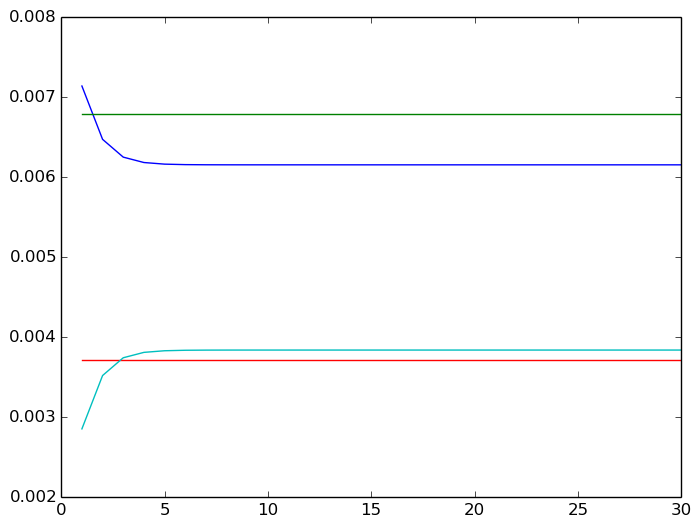

4-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f38d79f34d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f38d79f3750>
 PyObject <matplotlib.lines.Line2D object at 0x7f38d79f3e10>
 PyObject <matplotlib.lines.Line2D object at 0x7f38d7a00490>

In [166]:
plot(n,UpX,n,ExactoCramerUpX,n,ExactoCramerDownX,n,DownX)

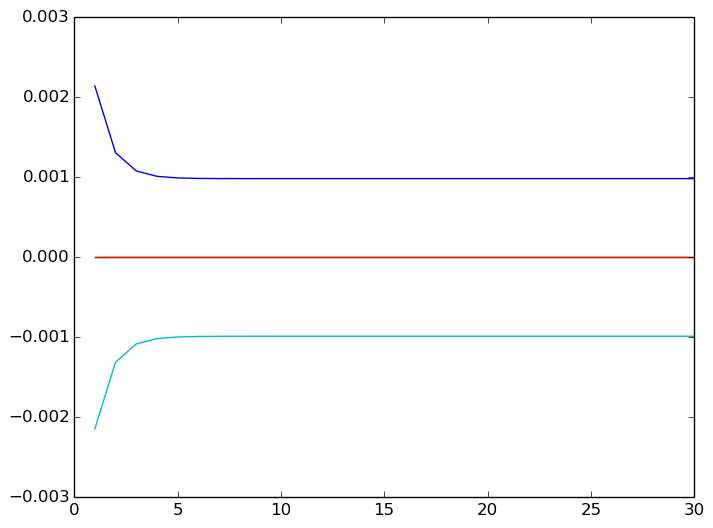

4-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f38d792da50>
 PyObject <matplotlib.lines.Line2D object at 0x7f38d792dcd0>
 PyObject <matplotlib.lines.Line2D object at 0x7f38d79393d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f38d7939a10>

In [167]:
plot(n,UpY,n,ExactoCramerUpY,n,ExactoCramerDownY,n,DownY)

In [35]:
function midpoint(V::IntervalVector)
    x=zeros(Real,size(V)[1])
    for i=1:size(V)[1]
        x[i]=midpoint(V[i])
    end
    return x
end

midpoint (generic function with 3 methods)

###TODO TRABAJANDO, PROGRAMEMOS GAUSS-SEIDEL

In [2]:
using Intervalos
using IntervalMatrices

    promote_type(Type{T<:Number},Type{Interval}) at /home/juser/Untitled Folder/Intervalos.jl:327
is ambiguous with: 
    promote_type(Type{None},Type{T}) at promotion.jl:103.
To fix, define 
    promote_type(Type{None},Type{Interval})
before the new definition.
    promote_type(Type{T<:Number},Type{Interval}) at /home/juser/Untitled Folder/Intervalos.jl:327
is ambiguous with: 
    promote_type(Type{T},Type{T}) at promotion.jl:101.
To fix, define 
    promote_type(Type{_<:Number},Type{_<:Number})
before the new definition.


In [33]:
1/Interval(1)

LoadError: `/` has no method matching /(::Int64, ::Interval)
while loading In[33], in expression starting on line 1

In [4]:
R1=Interval(900,1100)
R2=Interval(900,1100)
R3=Interval(900,1100)

V1=Interval(10)
V2=Interval(5)
A=[R1+R2 -R2;-R2 R2+R3]
b=[V1;-V2];

In [9]:
A

2x2 Array{Interval,2}:
 Interval(1800,2200)   Interval(-1100,-900)
 Interval(-1100,-900)  Interval(1800,2200) 

In [10]:
b

2-element Array{Interval,1}:
 Interval(10,10)
 Interval(-5,-5)

In [11]:
Y=inv(Midpoint(A))

2x2 Array{Float64,2}:
 0.000666667  0.000333333
 0.000333333  0.000666667

In [13]:
Y=10e-4*[6 3;6 3]
Y*b

2-element Array{Any,1}:
 Interval(0.04499999999999999,0.045000000000000005)
 Interval(0.04499999999999999,0.045000000000000005)

In [7]:
Y=inv(Midpoint(A))
G=Y*A

2x2 Array{Interval,2}:
 Interval(0.8333333333333333,1.166666666666667)      …  Interval(-0.13333333333333341,0.13333333333333341)
 Interval(-0.13333333333333341,0.13333333333333341)     Interval(0.8333333333333333,1.166666666666667)    

In [8]:
B=Y*b

2-element Array{Interval,1}:
 Interval(0.004999999999999999,0.005000000000000001)   
 Interval(-4.336808689942018e-19,4.336808689942018e-19)

In [ ]:
n=[i for i in 1:1:30]

In [29]:
function GaussSeidelStep(A::IntervalMatrix,b::IntervalVector,x::IntervalVector,n::Int64) # x vector inicial
    Y=inv(Midpoint(A))
    G=Y*A
    C=Y*b
    numerador=C
    X_=Interval[]
    W=Interval[]
    Z=Interval[]
    n=1:size(A)[1]   #Numero de ecuaciones
    
    X=x #Inicialización
    
    for i=1:n   
        if i>1
            numerador=numerador-G[i,i-1]*X[i-1]
        end

        if i<n
            numerador=numerador-G[i,i+1]*X[i+1]
        end


        push!(X_,(1/G[i,i])*(C[i]-Z[i]-W[i]))

        push!(X,Intersection(X_,X))
        
    end
    
    return X
end

GaussSeidelStep (generic function with 1 method)

In [58]:
    Y=inv(Midpoint(A))
    G=Y*A
    C=Y*b
    numerador=C
    X_=Interval[]
    W=Interval[]
    Z=Interval[]
    n=size(A)[1]   #Numero de ecuaciones
    
X=[Interval(0);Interval(0)] #Inicialización
    
for i=1:n 
    if i>1
       numerador=numerador-G[i,i-1]*X[i-1]
        push!(numerador)
    end
    
    if i<n
        numerador=numerador-G[i,i+1]*X[i+1]
    end
end

2-element Array{Interval,1}:
 Interval(0.004999999999999999,0.005000000000000001)   
 Interval(-4.336808689942018e-19,4.336808689942018e-19)

In [49]:
function +(V::IntervalVector,c::Real)
    U=Interval[]
    for i=1:size(V)[1]
        push!(U,V[i]+c)
    end
    return U
end

+(c::Real,V::IntervalVector)=+(V,c)

function -(V::IntervalVector,x::Real)
    U=Interval[]
    for i=1:size(V)[1]
        push!(U,V[i]-x)
    end
    return U
end

-(x::Real,V::IntervalVector)=-(V,x)*(-1)


function +(V::IntervalVector,x::Interval)
    U=Interval[]
    for i=1:size(V)[1]
        push!(U,V[i]+x)
    end
    return U
end

+(x::Interval, V::IntervalVector)=+(V,x)

function *(V::IntervalVector,x::Interval)
    U=Interval[]
    for i=1:size(V)[1]
        push!(U,V[i]*x)
    end
    return U
end

+(x::Interval, V::IntervalVector)=*(V,x)

function -(V::IntervalVector,x::Interval)
    U=Interval[]
    for i=1:size(V)[1]
        push!(U,V[i]-x)
    end
    return U
end

-(x::Interval,V::IntervalVector)=-(V,x)*(-1)

function +(A::IntervalMatrix,c::Real)
    v=zeros(Any,size(A)[1],size(A)[2])
    for i=1:size(A)[1]
            for j=1:size(A)[2]
                    v[i,j]=A[i,j]+c
            end
        end
    return v
end

+(c::Number, A::IntervalMatrix)=+(A,c)

function -(A::IntervalMatrix,c::Real)
    v=zeros(Any,size(A)[1],size(A)[2])
    for i=1:size(A)[1]
            for j=1:size(A)[2]
                    v[i,j]=A[i,j]-c
            end
        end
    return v
end

-(c::Number, A::IntervalMatrix)=(-(A,c))*(-1)

function +(A::IntervalMatrix,x::Interval)
    v=zeros(Any,size(A)[1],size(A)[2])
    for i=1:size(A)[1]
            for j=1:size(A)[2]
                    v[i,j]=A[i,j]+x
            end
        end
    return v
end

+(c::Interval, A::IntervalMatrix)=+(A,c)

function -(A::IntervalMatrix,x::Interval)
    v=zeros(Any,size(A)[1],size(A)[2])
    for i=1:size(A)[1]
            for j=1:size(A)[2]
                    v[i,j]=A[i,j]-x
            end
        end
    return v
end

-(x::Interval, A::IntervalMatrix)=(-(A,x))*(-1)


function *(A::IntervalMatrix,x::Interval)
    v=zeros(Any,size(A)[1],size(A)[2])
    for i=1:size(A)[1]
            for j=1:size(A)[2]
                    v[i,j]=A[i,j]*x
            end
        end
    return v
end

*(c::Interval, A::IntervalMatrix)=*(A,c)

- (generic function with 254 methods)

In [34]:
  function /(n::Real, y::Interval)
   m=Interval(0.0, 0.0)
    with_rounding(RoundDown) do
      m.left=n
    end
    with_rounding(RoundDown) do
      m.right=n
    end
  return m/y
  end

/ (generic function with 84 methods)

###TODAS LAS OPERACIONES ACTUALIZADAS, siguiente paso, GaussSeidel

In [2]:
workspace()
using Intervalos
using IntervalMatrices


function Midpoint(x::Interval)
    return (x.left+x.right)/2
end

function Midpoint(M::IntervalMatrix)
    x=zeros(Real,size(M)[1],size(M)[2])
    for i=1:size(M)[1]
        for j=1:size(M)[2]
            x[i,j]=Midpoint(M[i,j])
        end
    end
    return x
end

function Midpoint(V::IntervalVector)
    x=zeros(Real,size(V)[1])
    for i=1:size(V)[1]
        x[i]=Midpoint(V[i])
    end
    return x
end;

    promote_type(Type{T<:Number},Type{Interval}) at /home/juser/Untitled Folder/Intervalos.jl:327
is ambiguous with: 
    promote_type(Type{None},Type{T}) at promotion.jl:103.
To fix, define 
    promote_type(Type{None},Type{Interval})
before the new definition.
    promote_type(Type{T<:Number},Type{Interval}) at /home/juser/Untitled Folder/Intervalos.jl:327
is ambiguous with: 
    promote_type(Type{T},Type{T}) at promotion.jl:101.
To fix, define 
    promote_type(Type{_<:Number},Type{_<:Number})
before the new definition.
    +(Array{Interval,1},Real) at /home/juser/Untitled Folder/IntervalMatrices.jl:97
is ambiguous with: 
    +(AbstractArray{Bool,N},Bool) at array.jl:770.
To fix, define 
    +(Array{Bool,1},Bool)
before the new definition.
    +(Real,Array{Interval,1}) at /home/juser/Untitled Folder/IntervalMatrices.jl:104
is ambiguous with: 
    +(Bool,AbstractArray{Bool,N}) at array.jl:771.
To fix, define 
    +(Bool,Array{Bool,1})
before the new definition.
    -(Real,Array{Inter

In [3]:
R1=Interval(900,1100)
R2=Interval(900,1100)
R3=Interval(900,1100)

V1=Interval(10)
V2=Interval(5)
A=[R1+R2 -R2;-R2 R2+R3]
b=[V1;-V2];

####FALTA AGREGAR `/` has no method matching /(::Array{Interval,1}, ::Interval)

In [4]:
function /(V::IntervalVector,x::Interval)
    U=Interval[]
    for i=1:size(V)[1]
        push!(U,ExtendedDivision(V[i],x))
    end
    return U
end

/ (generic function with 84 methods)

In [5]:
function GaussSeidelStep(A::IntervalMatrix,b::IntervalVector,x::IntervalVector)
    Y=inv(Midpoint(A))                                      
    G=Y*A                                                   # x=Vector inicial
    C=Y*b                                                   # Antes de la Intersección
    numerador=C
    n=size(A)[1]   #Numero de ecuaciones
    
    X=x #Inicialización
    for i=1:n  
        if contains(G[i,i],0)==false   
            if i>1
                for j=1:i-1
                numerador=numerador-G[i,j]*X[j]
                end
            end

            if i<n
                for j=i+1:n
                numerador=numerador-G[i,j]*X[j]
                end
            end


        else
            return error("Un elemento diágonal contiene al cero")
        end
        return numerador/G[i,i]
    end

    
    #return numerador/G[i,i]
end

GaussSeidelStep (generic function with 1 method)

In [6]:
x0=[Interval(-1,1);Interval(-1,1)]
x1=Intersection(GaussSeidelStep(A,b,x0),x0)
x2=Intersection(GaussSeidelStep(A,b,x1),x1)
x3=Intersection(GaussSeidelStep(A,b,x2),x2)
x4=Intersection(GaussSeidelStep(A,b,x3),x3)
x5=Intersection(GaussSeidelStep(A,b,x4),x4)
x6=Intersection(GaussSeidelStep(A,b,x5),x5)
x7=Intersection(GaussSeidelStep(A,b,x6),x6)

2-element Array{Interval,1}:
 Interval(0.0042837968896,0.00600268435456)            
 Interval(-2.6843545599993956e-6,2.6843545599993956e-6)

In [7]:
function GaussSeidel(A::IntervalMatrix,b::IntervalVector,x::IntervalVector,i::Int64) # i numero de iteraciones
    for n=1:i
        X_=GaussSeidelStep(A,b,x)
        x=Intersection(X_,x)  
    end
    return x
end

GaussSeidel (generic function with 1 method)

In [8]:
x0=[Interval(-1,1);Interval(-1,1)]
GaussSeidel(A,b,x0,10)

2-element Array{Interval,1}:
 Interval(0.004285706432059801,0.006000010995116277)   
 Interval(-1.0995116277140544e-8,1.0995116277140544e-8)

###GAUSS-SEIDEL WORKING

In [9]:
using PyPlot
x0=[Interval(-1,1);Interval(-1,1)]
Up=Float64[]
Down=Float64[]
for n=1:30
    push!(Up,GaussSeidel(A,b,x0,n)[1].right)
    push!(Down,GaussSeidel(A,b,x0,n)[1].left)
end
n=[i for i in 1:1:30];

    close(Union(Symbol,Figure,String,Integer),) at /home/juser/.julia/v0.3/PyPlot/src/PyPlot.jl:377
is ambiguous with: 
    close(Union(Figure,Symbol,String,Integer),) at /home/juser/.julia/v0.3/PyPlot/src/PyPlot.jl:377.
To fix, define 
    close(Union(Symbol,String,Integer),)
before the new definition.


In [ ]:
plot(n,Up,n,Down)

 in PyObject at /home/juser/.julia/v0.3/PyCall/src/numpy.jl:187
 in map at tuple.jl:49
 in pycall at /home/juser/.julia/v0.3/PyCall/src/PyCall.jl:384
 in plot at /home/juser/.julia/v0.3/PyPlot/src/PyPlot.jl:371
 in include_string at loading.jl:97
 in execute_request_0x535c5df2 at /home/juser/.julia/v0.3/IJulia/src/execute_request.jl:157
 in eventloop at /home/juser/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340
 in PyObject at /home/juser/.julia/v0.3/PyCall/src/numpy.jl:187
 in map at tuple.jl:48
 in map at tuple.jl:49
 in pycall at /home/juser/.julia/v0.3/PyCall/src/PyCall.jl:384
 in plot at /home/juser/.julia/v0.3/PyPlot/src/PyPlot.jl:371
 in include_string at loading.jl:97
 in execute_request_0x535c5df2 at /home/juser/.julia/v0.3/IJulia/src/execute_request.jl:157
 in eventloop at /home/juser/.julia/v0.3/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:340
